In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x_train_flat = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_flat  = x_test.reshape(x_test.shape[0], 28 * 28)

print(x_train_flat.shape)
print(x_test_flat.shape)


(60000, 784)
(10000, 784)


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_std = (x_train_flat - x_train_flat.mean()) / x_train_flat.std()
x_train_pca = pca.fit_transform(x_train_std)

print(x_train_pca.shape)

(60000, 2)


In [7]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.09704664 0.07095924]


In [8]:
cumulative_variance=np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.09704664 0.16800588]


In [10]:
print(f"Percentage sum of explained variance for the first two components: {np.round(cumulative_variance[1] * 100, 2)}%")

Percentage sum of explained variance for the first two components: 16.8%


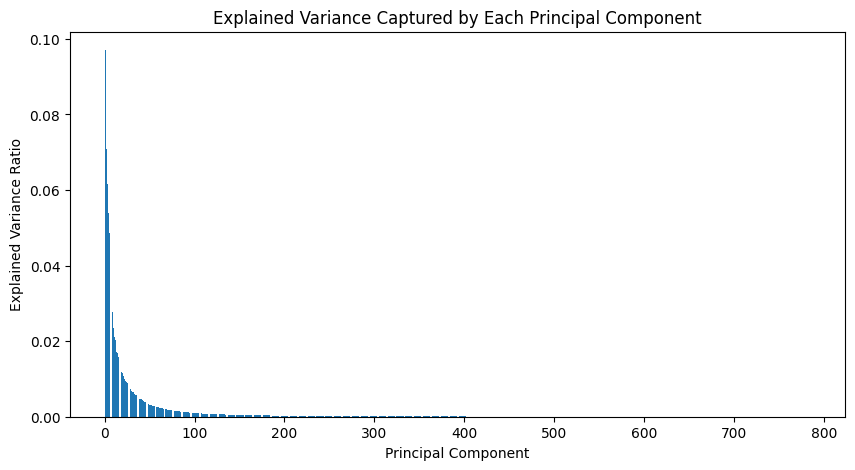

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA with many components (or all)
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_std)

explained_variance = pca.explained_variance_ratio_

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Captured by Each Principal Component")
plt.show()

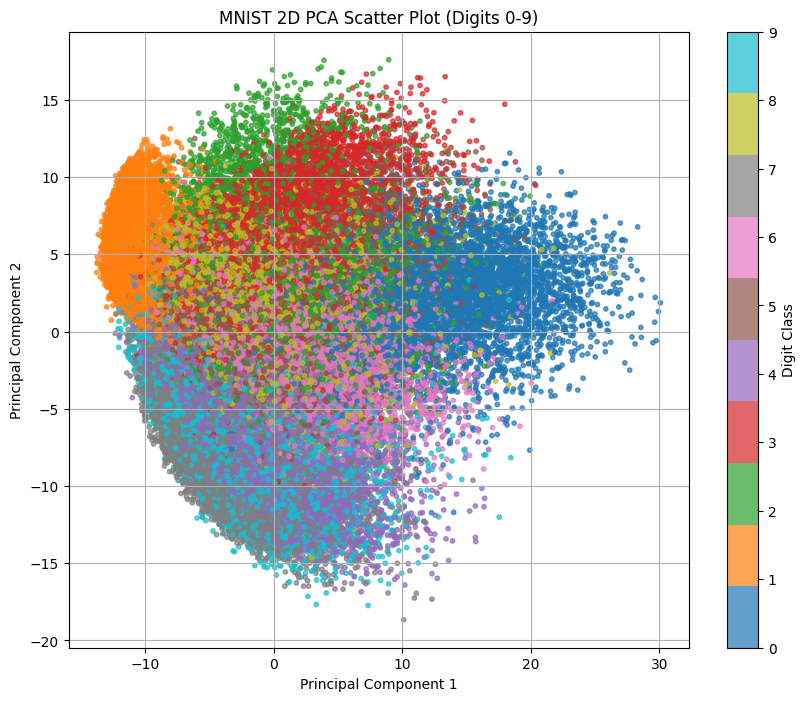

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x_train_pca[:, 0],
    x_train_pca[:, 1],
    c=y_train,
    cmap='tab10',
    s=10,
    alpha=0.7
)
plt.colorbar(scatter, ticks=range(10), label='Digit Class')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("MNIST 2D PCA Scatter Plot (Digits 0-9)")
plt.grid(True)
plt.show()


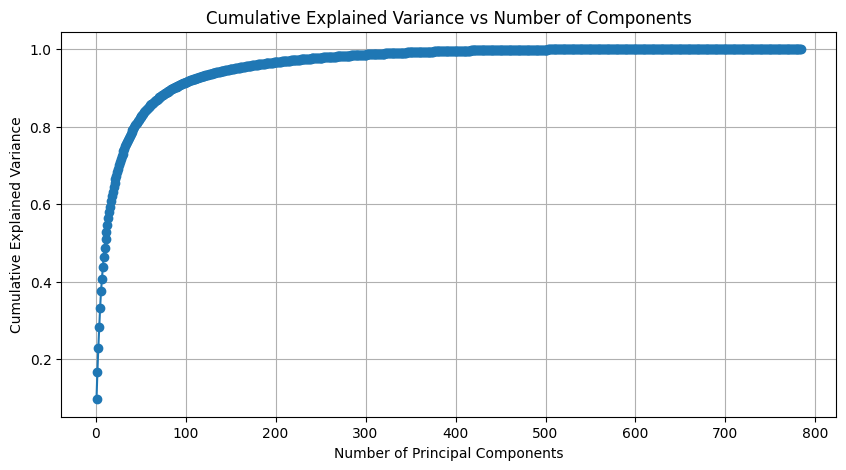

In [13]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o'
)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs Number of Components")
plt.grid(True)
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
digits=load_digits()

In [15]:
print(digits['data'].shape)
print(digits['target'].shape)


(1797, 64)
(1797,)


In [16]:
tsne=TSNE(n_components=2,random_state=42)
x_transformed=tsne.fit_transform(digits['data'])

In [18]:
import pandas as pd
tsne_df = pd.DataFrame(np.column_stack((x_transformed, digits['target'])), columns=['x', 'y', 'targets'])
tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

In [20]:
tsne_df.head(10)

,x,y,targets
0,-3.024210,-53.885437,0.0
1,10.376657,11.264841,1.0
2,-13.521493,18.822712,2.0
3,-35.524765,-6.349295,3.0
4,40.953392,7.328811,4.0
5,-27.095041,-15.059107,5.0
6,34.530472,-14.780560,6.0
7,2.225859,42.040230,7.0
8,-14.532291,5.938167,8.0
9,-20.070793,-15.172290,9.0


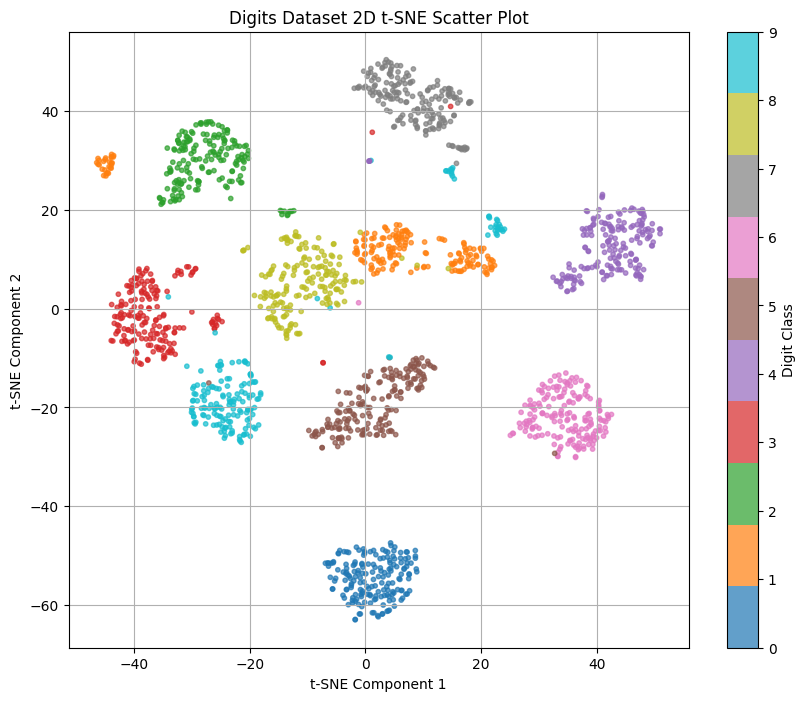

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    tsne_df['x'],
    tsne_df['y'],
    c=tsne_df['targets'],
    cmap='tab10',
    s=10,
    alpha=0.7
)
plt.colorbar(scatter, ticks=range(10), label='Digit Class')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Digits Dataset 2D t-SNE Scatter Plot')
plt.grid(True)
plt.show()